# Introducción

A lo largo de este documento se presentaran una serie de análisis acerca de diversas compañias de taxis en Estados Unidos y los viajes que se realizarón el 15 y 16 de noviembre del 2017, así también, se analizarán el promedio de viajes que finalizarón en los distintos barrios de Chicago.

## Tabla de contenido

- Introducción: Se presentan las intenciones del análisis a realizar.
- Preprocesamiento de datos: Se ajustan los datos de los diferentes `dataframe` al tipo de dato correcto.
- Análisis exploratorio: Se presentan las principales compañias de taxi y los barrios destinos con mayor afluencia.
- Prueba de hipótesis: Se presenta la prueba de hipótesis sobre los tiempos promedio de los viajes los días sábado de la semana con los distintos climas.
- Conclusiones.

# Preprocesamiento de datos

## Importando librerias

In [1]:
# Importando librerias
import pandas as pd
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns

In [2]:
# Generando df1
df1 = pd.read_csv('datasets/project_sql_result_01.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


El primer dataframe importado es `df1` el cuál contiene las empresas de taxi y el número de viajes realizados por cada empresa el 15 y 16 de noviembre del 2017; de manera general y como primer vistazo, podemos obsevar que no contamos con datos faltantes, ademas también, se tienen los tipos de datos correctos para cada columna, sin embargo, para asgurarnos de dicha información, imprimiremos los primeros 10 registros contenidos en `df1`.

In [3]:
# Imprimiendo los primero 10 registros de "df1"
df1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [4]:
# Generando df2
df2 = pd.read_csv('datasets/project_sql_result_04.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


El dataframe `df2` contiene los barrios de Chicago y el promedio de viajes que terminarón en ellos, de igual manera, aparentemente contamos con los tipos de datos correctos así como completos. De igual forma, procederemos con la impresión de los 10 primeros registros para asegurarnos de esto.

In [5]:
# Imprimiendo los primero 10 registros de "df2"
df2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [6]:
# Generando df3
df3 = pd.read_csv('datasets/project_sql_result_07.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Por último `df3` contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Por el contrario de los anteriores, para este dataframe y como primer vistazo, es importante modificar el tipo de dato para la columna `start_ts` pasado de `object` a `datetime`. Por otro lado, contamos con una cantidad de registros completos.

Es por lo anterior que manejaremos la misma dinámica que en los anteriores dataframe para posteriormente convertir las columnas que lo requieran en el tipo de dato correcto.

In [7]:
# Imprimiendo los primero 10 registros de "df3"
df3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


## Corrección del tipo de dato para la columna "start_ts" de "df3"

Como podemos observar en la impresión anterior, la columna `stat_ts` requiere modificación en el tipo de dato pasando de `object` a `datetime`.

In [8]:
# Convirtiendo la columna "start_ts" de "object" a "datetime"
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Duplicidad de registros

Con la intención de evitar procesamiento innecesario primeramente procederemos con revisando si hay duplicidad de registros en `df1`, `df2` y `df3`.

In [9]:
# Verificando duplicidad de registros en "df1", "df2" y "df3"
print("df1:",df1.duplicated().sum())
print("df2:",df2.duplicated().sum())
print("df3:",df3.duplicated().sum())

df1: 0
df2: 0
df3: 197


Como podemos observar, `df3` tiene `197` registros duplicados. Por tal motivo, procederemos a eliminar dichos registros para que el análisis no se vea afectado posteriormente.

In [10]:
# Eliminando registros duplicados en "df3"
df3.drop_duplicates(inplace=True)
df3.reset_index(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               871 non-null    int64         
 1   start_ts            871 non-null    datetime64[ns]
 2   weather_conditions  871 non-null    object        
 3   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 27.3+ KB


Una vez se tienen los registros duplicados eliminados, podemos observar que pasamos de `1068` registros a `871`. A partir de este punto hemos finalizado con el preprocesamiento de los datos de las diferentes tablas dando inicio al análisis exploratorio de datos.

# Análisis exploratorio de datos

Comenzaremos los 10 barrios principales en terminos de finalización de viajes usando `df2`.

## Barrios principales en terminos de finalización de viajes en Chicago

In [11]:
# Imprimiendo los 10 principales barrios en terminos de finalización de viajes en Chicago
df2.sort_values(by='average_trips',ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [12]:
# Cantidad de barrios en Chicago
len(df2['dropoff_location_name'].unique())

94

Con la información obtenida, podemos observar que entre el primer barrio y el último de la lista, hay una diferencia sustancial en el promedio de viajes finalizados en cada uno pues el `Sheffield & DePaul` representa aproximadamente un `11%` del promedio finalizado en `Loop`.

Procederemos graficando las 10 empresas de taxi principales de acuerdo al número de viajes realizados y posteriormente los 10 barrios principales de acuerdo al número de viajes finalizados.

## Graficando las 10 empresas de taxi principales de acuerdo al número de viajes realizados

<AxesSubplot:xlabel='company_name', ylabel='# de viajes realizados'>

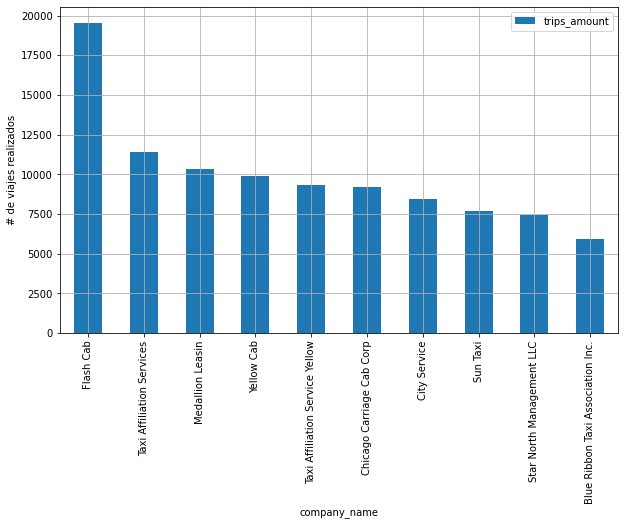

In [13]:
# Graficando las 10 empresas de taxi principales de acuerdo al número de viajes realizados
df1_result = df1.sort_values(by='trips_amount', ascending=False).head(10)
df1_result.plot(x='company_name',y='trips_amount',kind='bar',figsize=(10,6),grid=True, ylabel='# de viajes realizados')

De acuerdo con la gráfica, podemos observar que exceptuando `Flash Cab`, las 9 compañias restantes tienen un promedio de `7700` viajes en promedio. `Flash Cab` se posiciona en primer lugar con una notoria diferencia ascendiendo hasta casi los `20000` viajes realizados.

Presentaremos una tabla para visualizar con exactitud estos números.

In [14]:
# Tabla de valores para las 10 empresas de taxi principales de acuerdo al número de viajes realizados
df1_result

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Como podemos observar, efectivamente, para las distintas empresas que se dedican al servicio de taxi en Chicago, al menos entre el 15 y 16 de Noviembre de 2017, `Flash Cab` obtuvo un total de viajes muy superior a las empresas restantes, esto puede deberse a muchas cosas, como por ejemplo :
- Es una empresa considerablemente más grande en flotilla que el restante.
- Tarifas más bajas con respecto a la competencia.
- Mayor disponibilidad de autos durante las horas con mayor demanda.

Procederemos con graficar os 10 barrios principales de acuerdo al número de viajes finalizados.

## Graficando los 10 barrios principales de acuerdo al número de viajes finalizados

<AxesSubplot:xlabel='dropoff_location_name', ylabel='# de viajes finalizados'>

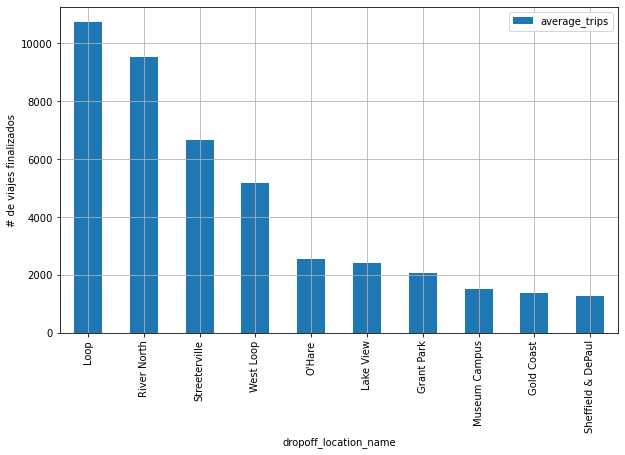

In [15]:
df2_result = df2.sort_values(by='average_trips',ascending=False).head(10)
df2_result.plot(x='dropoff_location_name',y='average_trips',kind='bar',figsize=(10,6),grid=True, ylabel='# de viajes finalizados')

En esta gráfica podemos observar que poco más de `10,000` viajes en promedio finalizarón en el barrio de `Loop` y esta cantidad promedio va bajando de manera exponencial hasta llegar al barrio de `Sheffield & DePaul` con aproximadamente `1250` viajes finalizados en esta zona.

# Prueba de hipótesis

## La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos que el resto de los días con otro clima

Continuaremos con las pruebas de hipótesis respecto a los viajes realizados desde `Loop` hasta el `Aeropuerto Internacional O'Hare` para los distintos días de la semana con los distintos climas registrados en `df3`.

Primero verificaremos que contemos con la información suficiente en `df3` para poder ejecutar la prueba de hipótesis correspondiente.

In [16]:
# Verificando la información dentro de "df3"
df3.head()

,index,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0


Como podemos observar, la prueba de hipótsis considera ademas del clima, el día de la semana y no contamos con alguna columna que se ajuste a este parámetro, sin embargo, este puede ser extraido de la columna `start_ts`.

In [17]:
# Extrayendo el día de la semana de la columna "start_ts" y agregandola a "df3" con el nombre de "weekday"
df3['weekday'] = df3['start_ts'].dt.dayofweek
df3.head()

,index,start_ts,weather_conditions,duration_seconds,weekday
0,0,2017-11-25 16:00:00,Good,2410.0,5
1,1,2017-11-25 14:00:00,Good,1920.0,5
2,2,2017-11-25 12:00:00,Good,1543.0,5
3,3,2017-11-04 10:00:00,Good,2512.0,5
4,4,2017-11-11 07:00:00,Good,1440.0,5


Con ayuda de la función `dt.dayofweek` pudimos extraer el día de la semana con la siguiente referencia:
- Lunes = 0
- Martes = 1
- Miercoles = 2
- Jueves = 3
- Viernes = 4
- Sábado = 5
- Domingo = 6

Para nosotros los parámetros de interes para la prueba de hipótesis serán `weather_conditions = Bad` y `weekday = 5`. Teniendo esta información procederemos con el planteaniento de la prueba de hipótesis.

Para asegurarnos que tenemos días diferentes de la semana, procederemos a validar los valores únicos en la columna `weekday`.

In [18]:
# Validando días de la semana existentes en "df3"
df3['weekday'].unique()

array([5])

Como podemos observar, todos los registros dentro de `df3` son del día sabado, por tal motivo no es de relevancia trabajar con la columna `weekday`. Continuaremos con el plateamiento de la `hipótesis nula` y `alternativa.

- H<sub>0</sub>: **La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos que el resto de los días con otro clima**
- H<sub>A</sub>:**La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente los sábados lluviosos que el resto de los días con otro clima**

Recordemos que para las pruebas de hipótesis es importante identificar cuál es la adecuada. Tenemos 4 opciones para poder trabajar y debemos conocer que es lo que esta pasando con nuestras pruebas y saber con que datos contamos:
- `Hipótesis con dos colas`: Requerímos de un valor específico de comparación con la media de la muestra.
- `Hipótesis con una cola`: Requerimos un valor específico de comparación con la media de la muestar, en este caso nuestro `p value` se dividirá entre 2 para considerar ambas posiciones.
- `Hipótesis sobre la igualdad de las medias de dos poblaciones`: Requerimos de dos muestras y si se conoce la varianza de ambas muestras y estas son iguales puede ajustarse el parámetro `equal_var = True`, en caso contrario se coloca en `False`.
- `Hipótesis sobre la igualdad de las medias de muestras emparejadas`:  Requerimos de dos muestras con la característica de que estas provienen del mismo set de datos con una diferencia temporal.

De acuerdo con la información anterior y por las características de H<sub>0</sub>, trabajaremos con `Hipótesis sobre la igualdad de las medias de dos poblaciones` creando una muestra para los viajes realizados en sábados lluviosos y otra para el resto de días con el resto de climas.


In [19]:
# Creando muestras para la prueba de hipótesis "m1" y "m2"
m1 = df3[(df3['weather_conditions'] == 'Bad')]
m2 = df3[(df3['weather_conditions'] != 'Bad')]
print('Muestra 1:',len(m1))
print('Muestra 2:',len(m2))

Muestra 1: 148
Muestra 2: 723


<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

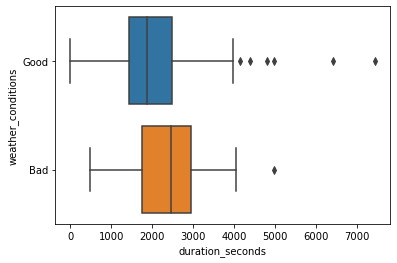

In [20]:
# Visualizando distribución de "df3" con respecto a "weather_condition" y "duration_seconds"
sns.boxplot(data=df3, x="duration_seconds", y="weather_conditions")

Para poder ejecutar la prueba de hipótesis, es importante primero determinar si las muestras tienen varianzas iguales o similares mayormente, para esto, pondremos a prueba dichas muestras usando el algoritmo de `Levene` que se encarga de probar que todas las entradas de la hipótesis nula tienen varianzas iguales. Propondremos un valor `alpha` del `5%` para tener un rango de error no tan cerrado pero que nos permita rechazar la hipótesis nula en caso de ser requerido.

In [21]:
# Ejecutando la prueba de "Levene"
alpha = 0.05
stat,p = levene(m1['duration_seconds'],m2['duration_seconds'])
print("P value:", p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

P value: 0.9806770360671218
No rechazamos la hipótesis nula


Este resultado nos indica que tenemos una varianza similar en un `98%` aproximadamente al tomar valores aleatorios de ambas muestras, por tal motivo, el hiperparametro `equal_var = True`. Continuaremos ejecutando la prueba de hipótesis.

In [22]:
# Ejecutando prueba de hipótesis
results = st.ttest_ind(m1['duration_seconds'],m2['duration_seconds'],equal_var = True)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  7.397770692813604e-08
Rechazamos la hipótesis nula


Una vez ejecutada la prueba de hipótesis, podemos rechazarla con seguridad pues es practicamente nulo `p-value`, es decir, tenemos evidencia suficiente como para dar paso a la hipótesis alternativa que plantea que **"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es  diferente los sábados lluviosos que el resto de los días con otro clima"**.

# Conclusiones

La prueba de hipótesis de entrada es lógica, esto es debido a que por lo general las personas que conducen, lo hacen con mayor precaución y cuidado cuando llueve por los diversos riesgos que esto implica. Al aplicar esto para todos los conductores que hay en ese momento, los tiempos de traslado se ven afectados aumentando.

En relación al día de la semana en que se realizan los viajes, no podemos hacer una comparación con los días que no son sábado puesto que `df3` solo contiene registros de viajes realizados los días sábado, sin embargo, al menos en México, podría aumentar la cantidad de demanda de servicios de taxi pues las personas suelen ocupar los días sábados como días recreativos.